### Introduction
This report presents an analysis of male and female body measurements using Python libraries such as NumPy, Pandas, Matplotlib, and Seaborn. The objective is to explore and visualize the differences in weight distributions, compute descriptive statistics, and analyze standardized body measurement

### Data Loading
The dataset consists of body measurements of adult males and females. The data is loaded from external sources using NumPy's genfromtxt function.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load the data
male_data_url = "nhanes_adult_male_bmx_2020.csv"
female_data_url = "nhanes_adult_female_bmx_2020.csv"

male = np.genfromtxt(male_data_url, delimiter=',', skip_header=1)
female = np.genfromtxt(female_data_url, delimiter=',', skip_header=1)

### Extract weights and remove NaN values

In [15]:
# Step 2: Extract weights and remove NaN values
male_weights = male[:, 0]
female_weights = female[:, 0]

male_weights = male_weights[~np.isnan(male_weights)]
female_weights = female_weights[~np.isnan(female_weights)]

### Histogram of Weights
A histogram is plotted for male and female weights using Matplotlib. This allows us to observe the frequency distribution of weight values across both groups.   
   #### Observations: 
   *  The distribution of male and female weights follows a normal trend.   
   *  Males generally exhibit a higher weight range compared to females.

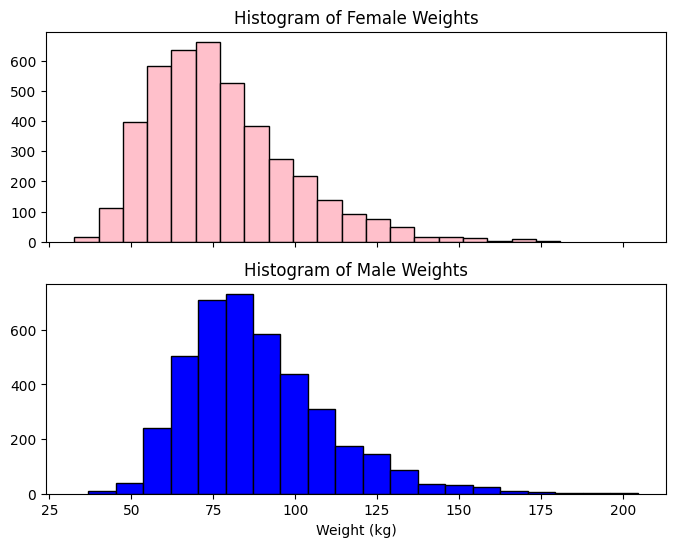

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax[0].hist(female_weights, bins=20, color='pink', edgecolor='black')
ax[0].set_title('Histogram of Female Weights')
ax[1].hist(male_weights, bins=20, color='blue', edgecolor='black')
ax[1].set_title('Histogram of Male Weights')
plt.xlabel("Weight (kg)")
plt.show()

### Boxplot for Weight Comparison
A boxplot is created to compare the weight distributions between males and females.
 #### Observations:
  * Males tend to have higher median weights compared to females.   
  *  There are potential outliers in both distributions, as seen in the boxplot.

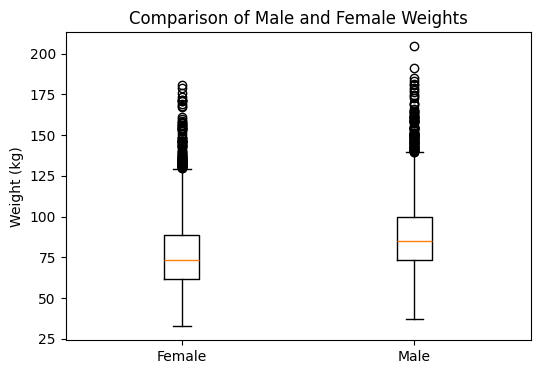

In [18]:
# Step 4: Boxplot
plt.figure(figsize=(6, 4))
plt.boxplot([female_weights, male_weights], tick_labels=['Female', 'Male'])
plt.title('Comparison of Male and Female Weights')
plt.ylabel('Weight (kg)')
plt.show()


### Statistical Summary
The mean, median, standard deviation, skewness, and kurtosis of male and female weights are computed.
#### Observations:
* The mean weight for males is higher than for females.
* The distributions exhibit slight skewness, indicating that some individuals have significantly higher weights.

In [22]:
# Step 5: Compute numerical aggregates
def compute_statistics(data):
    return {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Std Dev": np.std(data),
        "Skewness": pd.Series(data).skew(),
        "Kurtosis": pd.Series(data).kurt()
    }

stats_male = compute_statistics(male_weights)
stats_female = compute_statistics(female_weights)
print("Male Weight Statistics: \n", stats_male,"\n")
print("Female Weight Statistics: \n", stats_female)

Male Weight Statistics: 
 {'Mean': np.float64(88.36454300416565), 'Median': np.float64(85.0), 'Std Dev': np.float64(21.418936717962495), 'Skewness': np.float64(0.9846430235310972), 'Kurtosis': np.float64(1.4775680236244)} 

Female Weight Statistics: 
 {'Mean': np.float64(77.40379057095475), 'Median': np.float64(73.6), 'Std Dev': np.float64(21.54250829019315), 'Skewness': np.float64(1.033728460112216), 'Kurtosis': np.float64(1.4040520986737022)}


### BMI Computation
Body Mass Index (BMI) is calculated for female individuals using the formula:
 * BMI = weight (kg) / height (m)²   
   This additional metric helps assess overall body composition.

In [23]:
# Step 6: Add BMI to female matrix
female_bmi = female[:, 0] / (female[:, 1] / 100) ** 2
female = np.column_stack((female, female_bmi))

### Standardization of Female Data

 * To ensure comparability, the female data is standardized using Z-scores:  
    Z Score = (x − x̅ )/σ   
 x = Standardized random variable.  
 x̅ = Mean. σ = Standard deviation.   

In [24]:
# Step 7: Standardization of female data
zfemale = (female - np.nanmean(female, axis=0)) / np.nanstd(female, axis=0)

### Pairplot of Standardized Measurements   
A scatterplot matrix is generated to visualize the relationships among height, weight, waist, hip, and BMI.
 #### Observations:   
* BMI is strongly correlated with weight and waist measurements.   
* Height exhibits a weaker correlation with BMI compared to weight.

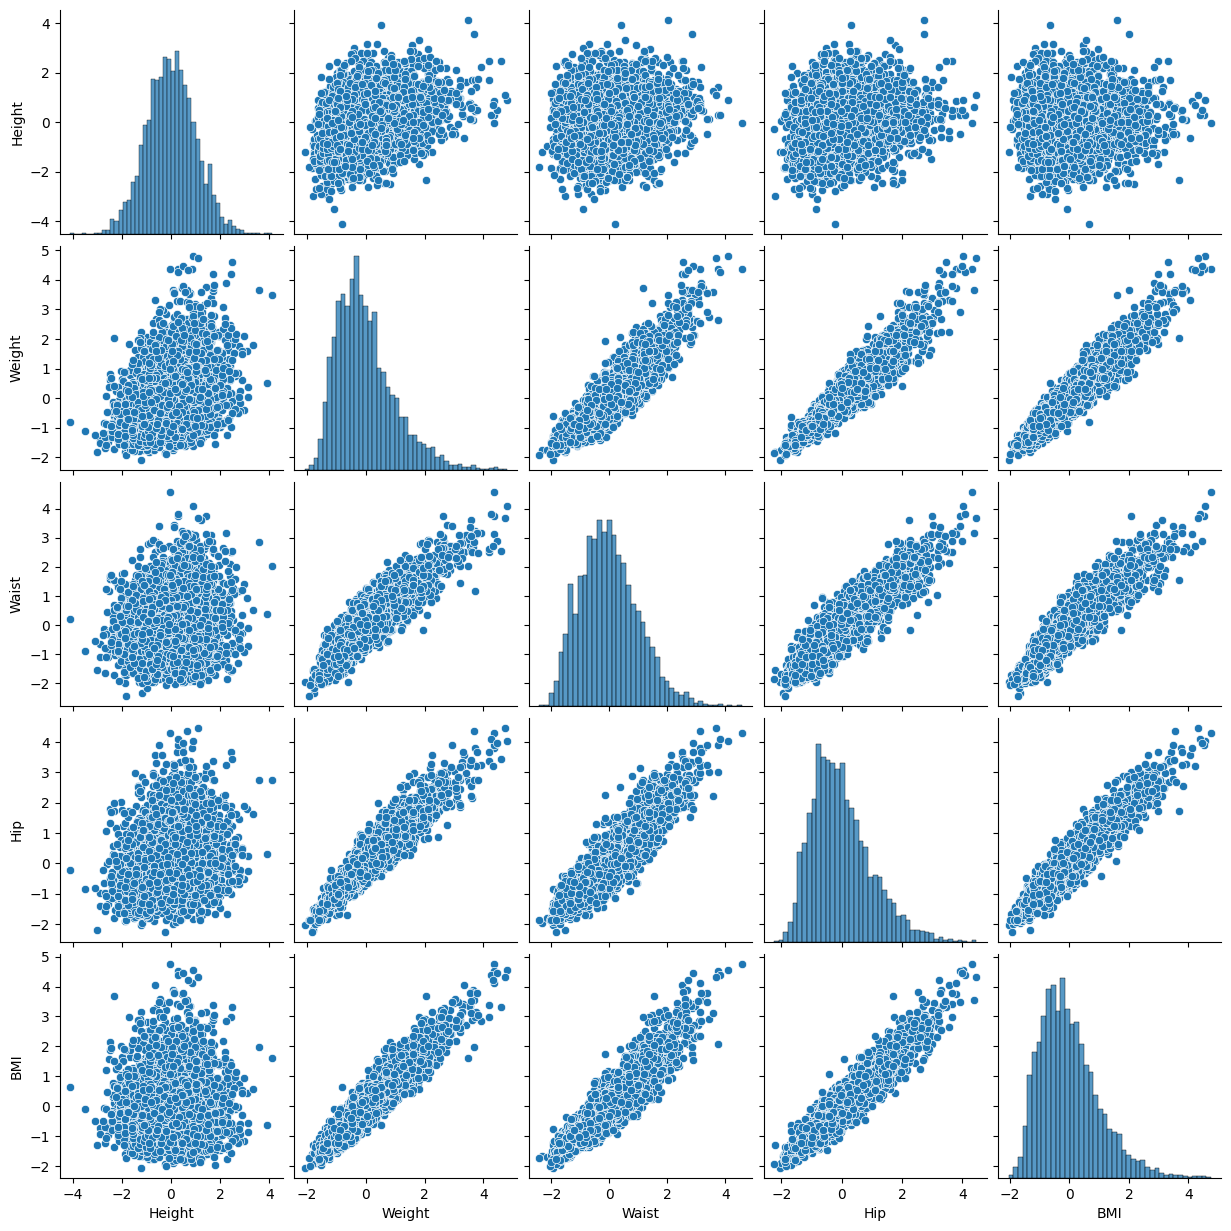

In [26]:
# Step 8: Scatterplot matrix
selected_cols = [1, 0, 6, 5, 7]
zfemale_df = pd.DataFrame(zfemale[:, selected_cols], columns=['Height', 'Weight', 'Waist', 'Hip', 'BMI'])
sns.pairplot(zfemale_df)
plt.show()

### Waist-Height and Waist-Hip Ratios
Waist-to-height and waist-to-hip ratios are computed and analyzed for both males and females. A boxplot is generated to compare these ratios.     
 #### Observations:    
 * Males and females exhibit different trends in waist-height and waist-hip ratios.    
 * Waist-hip ratio for males tends to be higher compared to females.

In [27]:
# Step 9: Add waist-height and waist-hip ratios (Handle NaN values)
male_ratios = np.column_stack((male, male[:, 6] / male[:, 1], male[:, 6] / male[:, 5]))
female_ratios = np.column_stack((female, female[:, 6] / female[:, 1], female[:, 6] / female[:, 5]))

# Ensure no NaN values
male_ratios = male_ratios[~np.isnan(male_ratios).any(axis=1)]
female_ratios = female_ratios[~np.isnan(female_ratios).any(axis=1)]

### Boxplot for Weight Comparison
A boxplot is used to visualize the distribution of male and female weights. The boxplot provides a summary of key statistical measures, including the median, interquartile range (IQR), and potential outliers.   
#### Observations:    
* The median weight for males is higher than that of females, indicating that, on average, males tend to weigh more.    
* The interquartile range (IQR) for both distributions shows the spread of weight values, with males exhibiting a broader range.       
* Outliers are present in both groups, representing individuals with exceptionally high or low weights.     
* This visualization helps compare weight distributions effectively and highlights key differences between the two groups.     

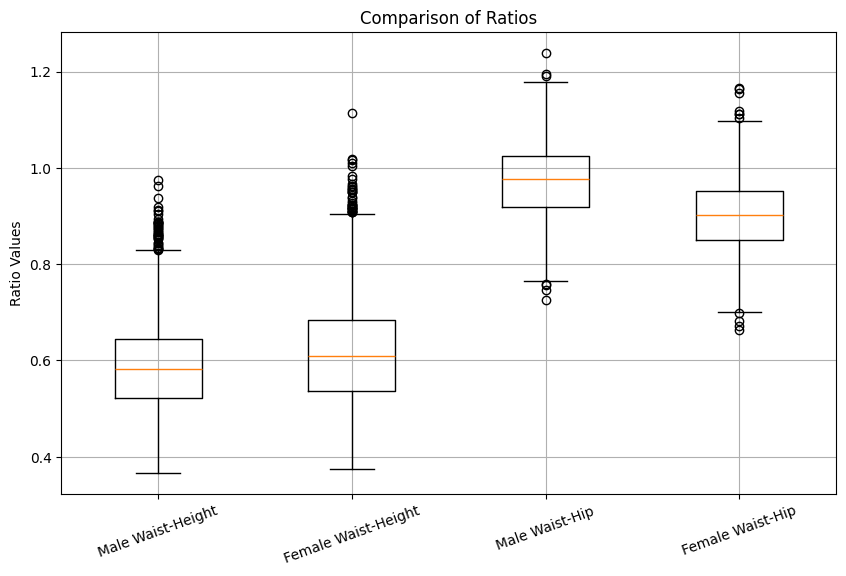

In [28]:
# Step 10: Boxplot for ratios
plt.figure(figsize=(10, 6))  # Larger figure size
plt.boxplot(
    [male_ratios[:, -2], female_ratios[:, -2], male_ratios[:, -1], female_ratios[:, -1]],
    tick_labels=['Male Waist-Height', 'Female Waist-Height', 'Male Waist-Hip', 'Female Waist-Hip']
)
plt.xticks(rotation=20)  # Rotate labels for better readability
plt.title('Comparison of Ratios')
plt.ylabel('Ratio Values')
plt.grid(True)
plt.show()

### Advantages of Metrics   
* Objective Measurement – Metrics provide a standardized and objective way to analyze data, reducing bias in decision-making.   
* Comparability – They enable comparison across different groups, making it easier to identify patterns and trends.    
* Performance Tracking – Metrics allow for monitoring progress over time, which is useful in identifying improvements or declines.    
* Predictive Insights – Some metrics help forecast future outcomes based on historical trends, aiding in strategic planning.    
* Data-Driven Decisions – Using well-defined metrics ensures that conclusions are backed by statistical evidence rather than assumptions.     
### Disadvantages of Metrics:   
* Context Dependence – Metrics alone may not provide meaningful insights without proper interpretation and context.
* Over-Simplification – Reducing complex data to a single metric can lead to loss of important information.
* Data Quality Issues – Inaccurate or incomplete data can distort metrics and lead to misleading conclusions.
* Over-Reliance on Quantitative Data – Focusing solely on metrics may ignore qualitative factors that could be equally important.
* Computational Complexity – Some advanced metrics require extensive computation and may not be easily interpretable.

### Analysis of Extreme BMI Values
Individuals with the highest and lowest BMI values are analyzed by selecting the five lowest and five highest BMI individuals based on the standardized dataset.   
 #### Observations:   
 * Those with extremely low BMI values tend to have lower standardized waist and hip measurements.    
 * High BMI individuals exhibit greater waist and hip measurements relative to their height.

In [30]:
# Step 12: Standardized body measurements for extreme BMI values
sorted_indices = np.argsort(female[:, -3])
low_bmi = zfemale[sorted_indices[:5]]
high_bmi = zfemale[sorted_indices[-5:]]
print("Lowest BMI Individuals: \n", low_bmi)
print("Highest BMI Individuals: \n", high_bmi)

Lowest BMI Individuals: 
 [[-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.80590812 -2.99302277 -2.35777349 -1.85344845 -1.73121713 -2.20697684
  -1.52252141 -1.31226827]
 [-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.74092033  0.06559138 -0.26899816  0.85300962 -2.64047645 -2.01494541
  -1.68921177 -1.88695626]
 [-1.76413025 -1.19467093 -1.80360861 -0.64020862 -1.76687436 -1.95733598
  -2.33298143 -1.67404787]]
Highest BMI Individuals: 
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.36328993 -0.03353037 -0.05585782 -0.17357792  2.77942222  4.31569054
   4.57029862  4.76243308]
 [ 3.66235019  0.63200141  0.5835632   0.38637892  2.2445638   4.37329997
   3.14480865  3.55716643]
 [ 4.72536476  1.11344994  2.24605786 -1.13794804  4.20571134  4.46931568
   3.6678715   4.30534087]
 [        nan         nan         nan 

### Conclusion   
This analysis provides insights into the distribution of body measurements, their statistical properties, and correlations. The results highlight differences in weight distributions, BMI, and body ratios between males and females. Future analyses could include additional factors such as age and lifestyle habits to gain deeper insights into body composition trends.